## Метод bootstrap 
Классический подход: 
Если признак в генеральной совокупности распределён нормально, то  выражение <br>  ![img](Stat/Снимок-распределение.png) <br> 
(где s - выборочное стандартное отклонение, μ - среднее в генеральной совокупности, n – размер выборки) будет распределено по распределению t-Student, с 𝑛 - 1 степенями свободы. <br>
Но что если, мы не знаем как распределён признак? Т.е у нас нет оснований предполагать, что мы имеем дело с нормальным распределением. <br> 
##### В данном случае мы можем обратиться к bootstrap. 
Бутстреп (bootstrap) - это метод для оценки стандартных отклонений и нахождения доверительных интервалов статистических функционалов. <br>
##### Пример: 
Задание: Необходимо рассчитать 90% доверительный интервал для медианы при помощи basic bootstrap. <br> 
Решение: У нас есть выборка, для решения поставленной задачи нам точно пригодится значение выборочной медианы. Затем нам необходимо сформировать множество бутсрапированных выборок с повторением из нашей исходной выборки. Теперь для каждой выборки рассчитаем, насколько медиана в этой выборке отклонилась от значения, рассчитанного в самом первом шаге. Ну вот и все, осталось только рассчитать 5 и 95 процентиль получившегося распределения, прибавить к ним значение выборочной медианы, готово! <br> 
##### Теперь рассмотрим пример с использованиеим Python:

    LSAT   GPA
0    576  3.39
1    635  3.30
2    558  2.81
3    578  3.03
4    666  3.44
5    580  3.07
6    555  3.00
7    661  3.43
8    651  3.36
9    605  3.13
10   653  3.12
11   575  2.74
12   545  2.76
13   572  2.88
14   594  2.96


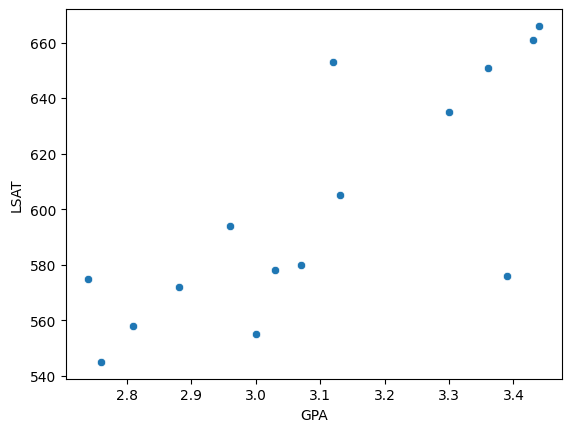

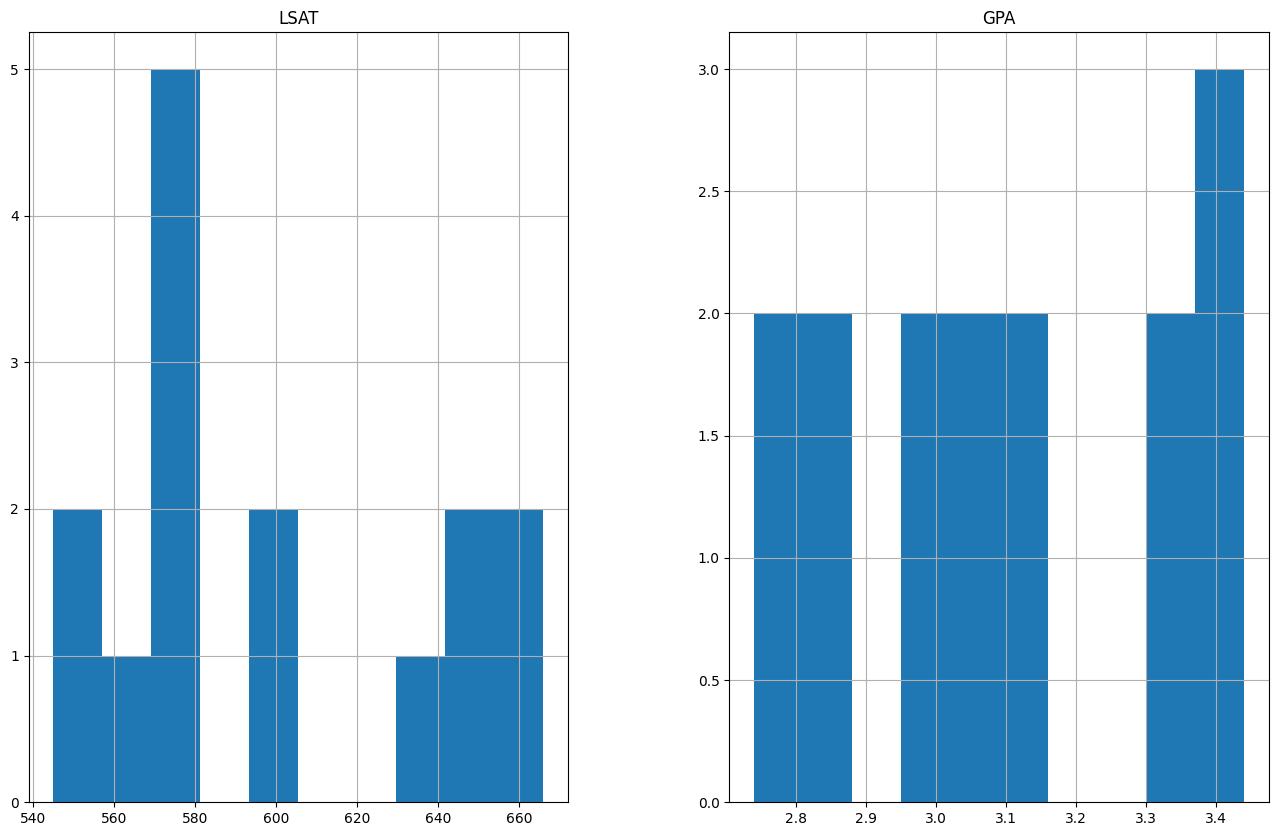

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bootstrap_stat import bootstrap_stat as bp
from bootstrap_stat import datasets as d
import seaborn

df = d.law_data()
print(df)
seaborn.scatterplot(x='GPA', y='LSAT', data=df)
# df.plot.hist(bins=40)
df.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)


Юридические данные представляют собой совокупность N = 82 американских юридических школ, участвовавших в большом исследовании практики приема. В 1973 году при поступлении в классы каждой школы были проведены два измерения: LSAT, средний балл класса по национальному юридическому тесту, и GPA, средний средний балл бакалавриата для класса. Доступны как полный набор данных, так и образец. Выше приведена выборка из 15 школ. <br>
Предположим, нас интересует корреляция между LSAT и GPA.

In [ ]:
dist = bp.EmpiricalDistribution(df)
dist.sample(reset_index=False)

,LSAT,GPA
1,635,3.30
7,661,3.43
4,666,3.44
7,661,3.43
14,594,2.96
9,605,3.13
3,578,3.03
1,635,3.30
7,661,3.43
8,651,3.36


In [ ]:
# Далее нам нужно реализовать статистику, которая будет применяться к бутстрап-выборкам.
def statistic(df):
     return np.corrcoef(df["LSAT"], df["GPA"])[0, 1]
obs_correlation = statistic(df) 
print(obs_correlation)

0.776374491289407


Теперь мы можем вычислить стандартную ошибку, которая является способом количественной оценки изменчивости статистики:

In [ ]:
se = bp.standard_error(dist, statistic)
print(se)

0.12580226955552068


Или мы можем вычислить доверительный интервал. <br>
Полученные данные представляют собой нижнюю и верхнюю границы 90% доверительного интервала, поведение по умолчанию bcanon_interval

In [ ]:
ci_low, ci_high = bp.bcanon_interval(dist, statistic, df)
print(f" 90%: { [ci_low, ci_high]}")

# доверительный интервал 95%:
ci_low, ci_high = bp.bcanon_interval(dist, statistic, df, alpha=0.025)
print(f" 95%: { [ci_low, ci_high]}")

 90%: [0.42119977416027465, 0.9296538673928407]
 95%: [0.2757322882500353, 0.9422403780158843]
